Installation Instructions :
=

Windows Python Installer :
=
pip install opencv-python <br>
pip install scikit-image

Ubuntu Python Installer :
=
pip3 install opencv-python <br>
pip3 install scikit-image


Installation Issues?
=
https://github.com/opencv/opencv/issues   <br>
https://github.com/scikit-image/scikit-image/issues

In [1]:
from skimage.feature import peak_local_max
from skimage import img_as_float
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

<h2>Adaptive thresholding</h2>


Adaptive thresholding, also called dynamic or local thresholding, establishes the threshold level for determining whether to convert to white or black at a regional level. The region sampled and method of evaluation vary between applications. Adaptive thresholding at a pixel level (in comparison with neighboring pixels) can yield highly superior results compared to global thresholding, particularly for images with varying levels of regional contrast differences.

In [2]:
def adaptive_thresholding(image):
    output_image = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,21,2)
    return output_image

<h2>Stroke Width</h2>

Stroke Width is calculation of the Strokes based on the following math calculations:

<b>Distance Transform:</b>
Calculates the distance to the closest zero pixel for each pixel of the source image.
<br>
<br>
<b>Peak local Maximum:</b>
The peak_local_max function returns the coordinates of local peaks (maxima) in an image. Internally, a maximum filter is used for finding local maxima. This operation dilates the original image and merges neighboring local maxima closer than the size of the dilation. Locations where the original image is equal to the dilated image are returned as local maxima.

In [3]:
def stroke_width(image):
    dist = cv2.distanceTransform(cv2.subtract(255,image), cv2.DIST_L2, 5)
    im = img_as_float(dist)
    coordinates = peak_local_max(im, min_distance=15)
    pixel_strength = []
    for element in coordinates:
        x = element[0]
        y = element[1]
        pixel_strength.append(np.asarray(dist)[x,y])
    mean_pixel_strength = np.asarray(pixel_strength).mean()
    return mean_pixel_strength

In [4]:
def plotting(image, cmap = None):
    if cmap == 'gray':
        height, width = image.shape
    else:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        height, width, depth = image.shape
        
    dpi = mpl.rcParams['figure.dpi']
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)

    # Display the image.
    plt.imshow(image, cmap)

In [5]:
#reading an Image
image = cv2.imread('abc.JPG', 0)
process_image = adaptive_thresholding(image)
stroke_width(process_image)

2.6352942

In [6]:
stroke_width(process_image)

2.6352942

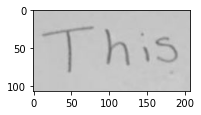

In [7]:
plotting(image)

In [8]:
#reading an Image
image = cv2.imread('abc0.JPG', 0)
process_image = adaptive_thresholding(image)
stroke_width(process_image)

2.4195352

In [9]:
stroke_width(process_image)

2.4195352

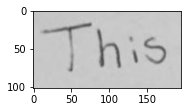

In [10]:
plotting(image)

In [11]:
#reading an Image
image = cv2.imread('abc1.JPG', 0)
process_image = adaptive_thresholding(image)
stroke_width(process_image)

5.008405

In [12]:
stroke_width(process_image)

5.008405

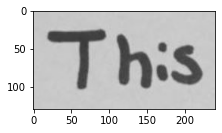

In [13]:
plotting(image)